<a href="https://colab.research.google.com/github/ashleyliang08/Personal-Projects-links-to-my-resume/blob/main/(%E6%A8%A1%E6%8B%9F)%E7%95%AA%E8%8C%84%E5%B0%8F%E8%AF%B4%E7%94%A8%E6%88%B7%E9%98%85%E8%AF%BB%E5%93%81%E7%B1%BB%E5%81%8F%E5%A5%BD%E5%8F%8A%E7%95%99%E5%AD%98%E5%88%86%E6%9E%90%26%E5%90%AC%E4%B9%A6%E6%97%B6%E9%95%BF%E5%A2%9E%E5%8A%A0AB_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**(模拟)番茄小说用户阅读品类偏好及留存分析&听书时长增加AB Test**

**Author:Ashley Liang**

##**Before Started**

**STATEMENT说明**

**1.daatset：** 通过随机模拟生成
This dataset is generated through simulation,and here're the attributes:

user_id（用户ID）

gender（性别）

age_group（年龄组）

register_date（注册日期）

register_days(注册天数)

read_category（阅读品类：言情 / 玄幻 / 悬疑 / 都市）

read_duration（单章阅读时长）

chapter_completion（章节完成率）

revisit_days（1个月内连续复访天数）

is_listen（是否使用听书）

listen_ratio（听书时长占比：听书总时长 / 阅读总时长）

like_count（月点赞数）

collect_count（收藏书籍数）

is_retained_user（是否留存：1月内连续7天复访）

**2.hypothesis：**
假设番茄小说当前听书业务的渗透率为<=30%。

##**番茄小说用户阅读品类偏好分布**

###**Import libraries**

In [84]:
!pip install pandas faker numpy
!pip install matplotlib
!pip install seaborn
import pandas as pd
from faker import Faker
import random
import numpy as np
from datetime import datetime, timedelta,date
import matplotlib.pyplot as plt
import seaborn as sns

###**Generate data**

In [85]:

fake = Faker()  # 生成Faker Generator
np.random.seed(42)  # 设置全局固定随机种子，确保数据可复现
user_count = 10000  # 模拟10000个用户

# 定义番茄小说核心业务参数
READ_CATEGORIES = ["Romance", "Fantasy", "Mystery", "Fiction"]  # 主流阅读品类
AGE_GROUPS = ["18-24 years old", "25-30 years old", "31-40 years old", "41 years old or more"]  # 用户年龄分布
GENDERS = ["male", "female"]
REGISTER_START_DATE = date(2023, 1, 1)


# 2. 生成用户的模拟数据
def generate_tomato_user_data():
    user_data = []
    for _ in range(user_count):
        # （1）用户基础信息
        user_id = f"Tomato_User_{fake.uuid4()[:8]}"  # 番茄用户ID格式
        gender = random.choice(GENDERS)  # 随机选择性别
        # 按权重选择年龄组（年轻用户占比更高）
        age_group = random.choices(AGE_GROUPS, weights=[0.4, 0.3, 0.2, 0.1], k=1)[0]

        # 随机生成注册时间及注册天数
        register_date = fake.date_between_dates(date_start=REGISTER_START_DATE, date_end=date.today())
        register_days = (date.today() - register_date).days

        # （2）阅读行为信息（按性别+年龄组设置差异化品类偏好）
        if gender == "female":  # 女性用户的品类偏好
            if age_group in ["18-24 years old", "25-30 years old"]:
                # 年轻女性更偏好 romance（言情）、fantasy（玄幻）
                read_category = random.choices(READ_CATEGORIES, weights=[0.4, 0.3, 0.15, 0.15])[0]
            else:
                # 年长女性更偏好 romance（言情）、fiction（都市）
                read_category = random.choices(READ_CATEGORIES, weights=[0.45, 0.1, 0.1, 0.35])[0]
        else:  # 男性用户的品类偏好
            if age_group in ["18-24 years old", "25-30 years old"]:
                # 年轻男性更偏好 fantasy（玄幻）、mystery（悬疑）
                read_category = random.choices(READ_CATEGORIES, weights=[0.1, 0.4, 0.3, 0.2])[0]
            else:
                # 年长男性更偏好 fiction（都市）、fantasy（玄幻）
                read_category = random.choices(READ_CATEGORIES, weights=[0.1, 0.3, 0.2, 0.4])[0]

        # 补充阅读行为的其他参数（之前遗漏的变量定义）
        read_duration = round(random.uniform(3, 60), 1)  # 单章阅读时长：3-60分钟
        chapter_completion = round(random.uniform(0.4, 1.0), 2)  # 章节完成率：40%-100%
        revisit_days = random.randint(1, 30)  # 1个月内的连续复访天数：1-30天

        # （3）听书行为信息
        is_listen = 1 if random.random() < 0.3 else 0
        if is_listen == 1:
            listen_ratio = round(random.uniform(0.2, 0.8), 2)  # 听书用户：听书占比20%-80%
        else:
            listen_ratio = 0.0  # 非听书用户：占比0

        # （4）互动与留存信息
        like_count = random.randint(0, 50) if revisit_days >= 7 else random.randint(0, 10)
        collect_count = random.randint(1, 20) if revisit_days >= 7 else random.randint(0, 5)
        is_retained_user = 1 if revisit_days >= 7 else 0  # 复访>=7天：判定为留存用户

        # 组装单条用户数据
        user_data.append([
            user_id, gender, age_group, register_date, register_days,
            read_category, read_duration, chapter_completion, revisit_days,
            is_listen, listen_ratio, like_count, collect_count, is_retained_user
        ])
    return user_data


# 3. 转换为DataFrame并保存
user_data_list = generate_tomato_user_data()
tomato_df = pd.DataFrame(
    user_data_list,
    columns=[
        "user_id", "gender", "age_group", "register_date", "register_days",
        "read_category", "read_duration", "chapter_completion", "revisit_days",
        "is_listen", "listen_ratio", "like_count", "collect_count", "is_retained_user"
    ]
)

# 保存为CSV文件
tomato_df.to_csv("番茄小说模拟用户行为数据.csv", index=False, encoding="utf-8-sig")
print(f"数据生成完成！共生成{user_count}条用户数据，已保存为CSV文件。")
print("\n数据预览（前20行）：")
tomato_df.head(20)


数据生成完成！共生成10000条用户数据，已保存为CSV文件。

数据预览（前20行）：


,user_id,gender,age_group,register_date,register_days,read_category,read_duration,chapter_completion,revisit_days,is_listen,listen_ratio,like_count,collect_count,is_retained_user
0,Tomato_User_531675e1,female,18-24 years old,2024-11-27,309,Fiction,43.4,0.99,22,0,0.00,50,19,1
1,Tomato_User_db9d9ec3,female,18-24 years old,2025-08-22,41,Romance,49.4,0.59,1,1,0.35,8,3,0
2,Tomato_User_649f114e,male,25-30 years old,2025-01-28,247,Mystery,17.1,0.44,21,0,0.00,40,11,1
3,Tomato_User_a2cb62a8,male,41 years old or more,2023-02-16,959,Fantasy,37.1,0.55,26,0,0.00,30,16,1
4,Tomato_User_ea63736b,male,18-24 years old,2025-08-01,62,Fantasy,19.2,0.78,5,0,0.00,6,3,0
5,Tomato_User_6a8865a2,male,18-24 years old,2024-09-03,394,Mystery,35.0,0.64,30,0,0.00,26,12,1
6,Tomato_User_e036ec27,male,18-24 years old,2025-02-21,223,Mystery,13.0,0.70,25,0,0.00,18,16,1
7,Tomato_User_a64d318b,female,18-24 years old,2025-08-19,44,Fiction,32.3,0.83,21,1,0.68,36,5,1
8,Tomato_User_cf6e5bd7,male,25-30 years old,2024-01-30,611,Mystery,4.5,0.81,5,0,0.00,10,1,0
9,Tomato_User_29995769,female,18-24 years old,2024-08-14,414,Romance,52.0,0.83,30,1,0.68,38,14,1


###**Expolratory data analysis**

In [86]:
#check rows and columns
tomato_df.shape

(10000, 14)

In [87]:
tomato_df.describe()

,register_days,read_duration,chapter_completion,revisit_days,is_listen,listen_ratio,like_count,collect_count,is_retained_user
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,501.804400,31.420880,0.700697,15.47210,0.29570,0.147112,21.011000,8.845100,0.799700
std,290.614502,16.361685,0.171689,8.65304,0.45638,0.246314,15.347072,6.111763,0.400245
min,1.000000,3.000000,0.400000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,249.750000,17.200000,0.550000,8.00000,0.00000,0.000000,7.000000,3.000000,1.000000
50%,505.000000,31.500000,0.700000,15.00000,0.00000,0.000000,19.000000,8.000000,1.000000
75%,751.000000,45.300000,0.850000,23.00000,1.00000,0.290000,34.000000,14.000000,1.000000
max,1005.000000,60.000000,1.000000,30.00000,1.00000,0.800000,50.000000,20.000000,1.000000


###**Distribution of genders across different ages**


In [88]:
# I want to see the distribution of genders across different ages
df_gender = pd.DataFrame(tomato_df.groupby(['gender', 'age_group']).size().rename('count'))
df_gender

count
gender age_group                  
female 18-24 years old        1998
       25-30 years old        1479
       31-40 years old        1003
       41 years old or more    524
male   18-24 years old        2009
       25-30 years old        1459
       31-40 years old        1022
       41 years old or more    506

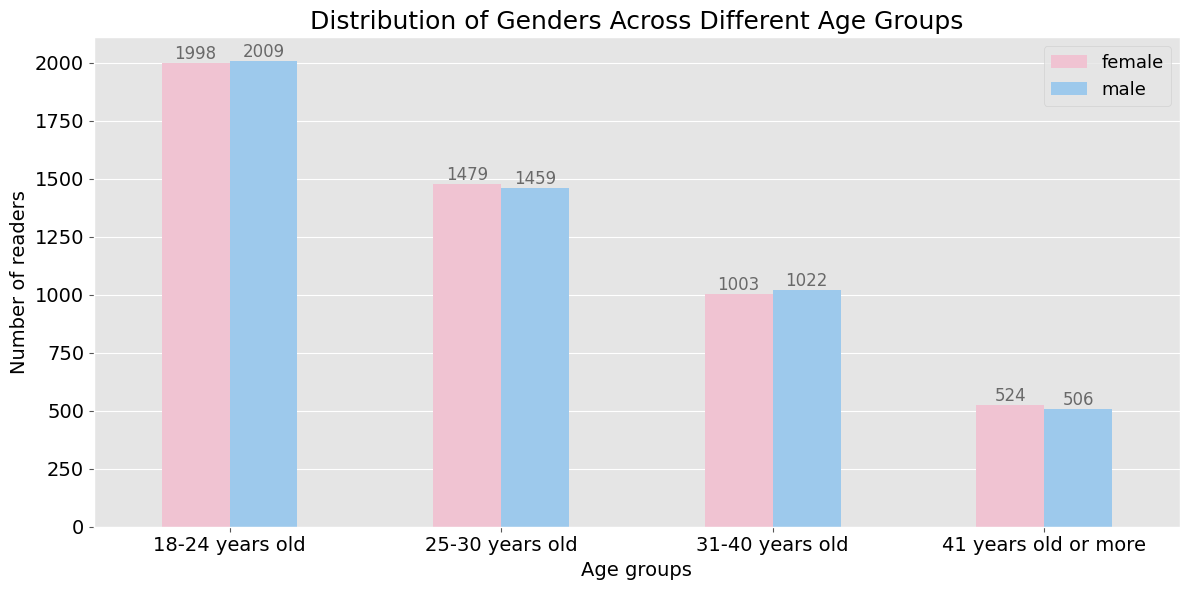

In [89]:
# Visualize the distribution of genders across different ages
plt.style.use('ggplot')
fig,ax = plt.subplots(figsize = (12,6))
color_list = ['#F8BBD0','#90CAF9']
sns.barplot(
    data=df_gender,
    x='age_group',
    y= 'count',
    hue='gender',palette= color_list,width = 0.5
)
plt.title('Distribution of Genders Across Different Age Groups',fontsize = 18)
plt.xlabel('Age groups',color = 'k',fontsize = 14)
plt.xticks(rotation = 0,color = 'k',fontsize = 14)
plt.ylabel('Number of readers',color = 'k',fontsize = 14)
plt.yticks(color = 'k',fontsize = 14)
plt.legend(fontsize = 13)
# Add counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, color='dimgrey',fontsize = 12)
plt.tight_layout()

plt.show()

###**Distribution of reading genres across different ages and genders**

In [90]:
df_genres = pd.DataFrame(tomato_df.groupby(['gender', 'age_group','read_category']).size().rename('count')).reset_index()
df_genres.head()

,gender,age_group,read_category,count
0,female,18-24 years old,Fantasy,599
1,female,18-24 years old,Fiction,305
2,female,18-24 years old,Mystery,298
3,female,18-24 years old,Romance,796
4,female,25-30 years old,Fantasy,458


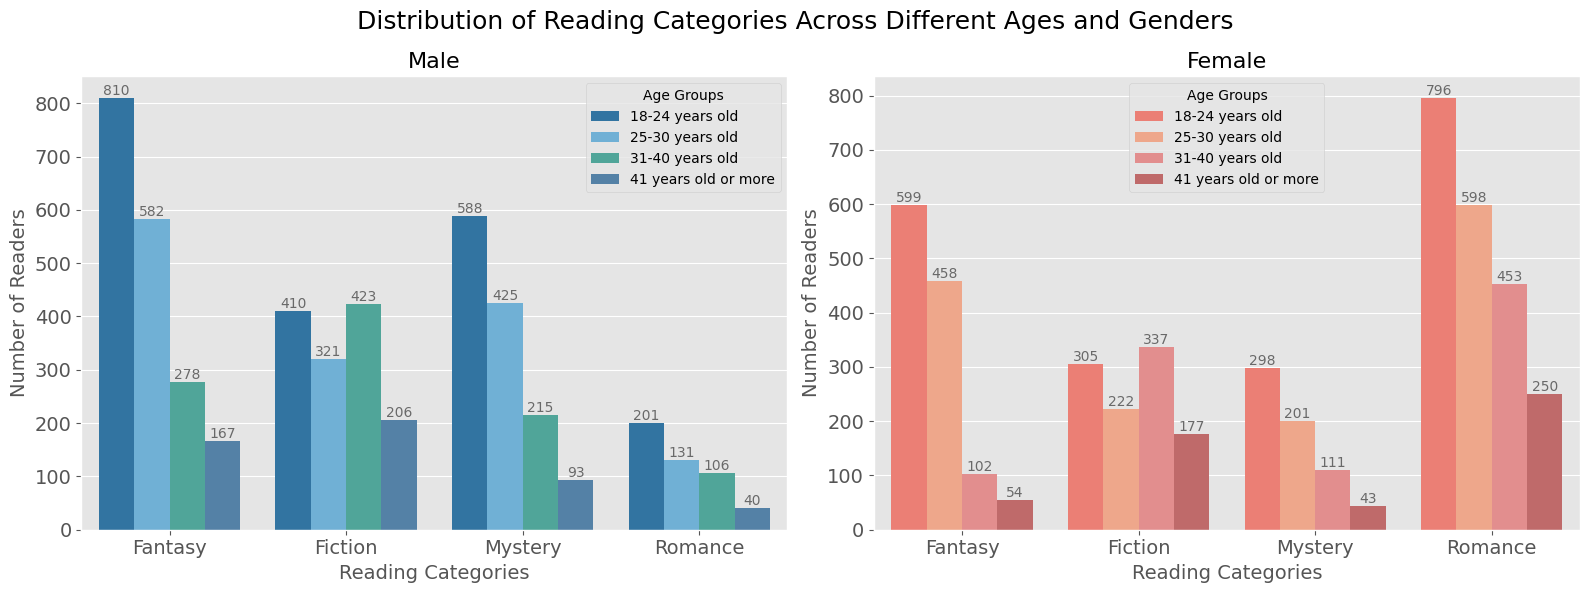

In [102]:
#fetch data
df_genres = tomato_df.groupby(['gender', 'age_group', 'read_category']).size().rename('count').reset_index()

male_data = df_genres[df_genres['gender'] == 'male']  # 男性用户数据
female_data = df_genres[df_genres['gender'] == 'female']  # 女性用户数据

#plot
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plt.style.use('ggplot')
#左图：男性用户的年龄组+品类偏好

color_list1 = ["#1F77B4", "#5FB4E6", "#42B3A3", "steelblue"]
# ["#42A5F5", "#90CAF9", "#26A69A", "#1565C0"]
sns.barplot(
    data=male_data,
    x='read_category',  # x轴：阅读品类
    y='count',          # y轴：读者数量
    hue='age_group',    # 用颜色区分年龄组
    errorbar=None,      # 去掉误差线
    ax=ax1,palette= color_list1
)

for container in ax1.containers:
    ax1.bar_label(container, color='dimgrey')

ax1.set_title('Male', fontsize=16)
ax1.set_xlabel('Reading Categories', fontsize=14)
ax1.set_ylabel('Number of Readers', fontsize=14)
ax1.tick_params(axis='x', labelsize=14)  # x轴刻度（品类名称）
ax1.tick_params(axis='y', labelsize=14)  # y轴刻度（数值）
ax1.legend(title='Age Groups',loc = 'upper right')




#右图：女性用户的年龄组+品类偏好
color_list2 = ["#FF6F61", "#FFA07A", "#F08080", "#CD5C5C"]
sns.barplot(
    data=female_data,
    x='read_category',
    y='count',
    hue='age_group',
    errorbar=None,
    ax=ax2,palette=color_list2
)
for container in ax2.containers:
    ax2.bar_label(container, color='dimgrey')

ax2.set_title('Female', fontsize=16)
ax2.set_xlabel('Reading Categories', fontsize=14)
ax2.set_ylabel('Number of Readers', fontsize=14)
ax2.tick_params(axis='x', labelsize=14)  # x轴刻度（品类名称）
ax2.tick_params(axis='y', labelsize=14)  # y轴刻度（数值）
ax2.legend(title='Age Groups',loc = 'upper center')


fig1.suptitle('Distribution of Reading Categories Across Different Ages and Genders', fontsize=18)

plt.tight_layout()

plt.show()

##**品类偏好与用户留存的关联**

**目标：明确 “哪个品类能提升留存”，为番茄优化推荐策略提供依据。**

In [92]:
# 1. 统计各品类的核心留存指标
retention_by_category = tomato_df.groupby(['read_category']).agg({
    'user_id': 'count',  # 该品类用户数
    'is_retained_user': 'sum',  # 该品类留存用户数
    'revisit_days': 'mean'  # 该品类用户平均复访天数
}).round(2)
# 计算留存率（留存用户数/总用户数）
retention_by_category['retention_rate'] = (retention_by_category['is_retained_user'] / retention_by_category['user_id'] * 100).round(2)
# 重命名列，便于理解
retention_by_category.reset_index(inplace=True)
retention_by_category.columns = ['Read_Categories','Total_Num_users', 'Retained_Users', 'Average_Revisit_Days', 'Retention_Rate(%)']
retention_by_category.set_index(['Read_Categories'],inplace=True)
print("- - - - - - - - - - - - -  - - - - - 各品类用户留存指标- - - - - - - - - - - - - - - - - - - - ")
retention_by_category


- - - - - - - - - - - - -  - - - - - 各品类用户留存指标- - - - - - - - - - - - - - - - - - - - 


,Total_Num_users,Retained_Users,Average_Revisit_Days,Retention_Rate(%)
Read_Categories,,,,
Fantasy,3050,2466,15.62,80.85
Fiction,2401,1939,15.46,80.76
Mystery,1974,1546,15.43,78.32
Romance,2575,2046,15.33,79.46


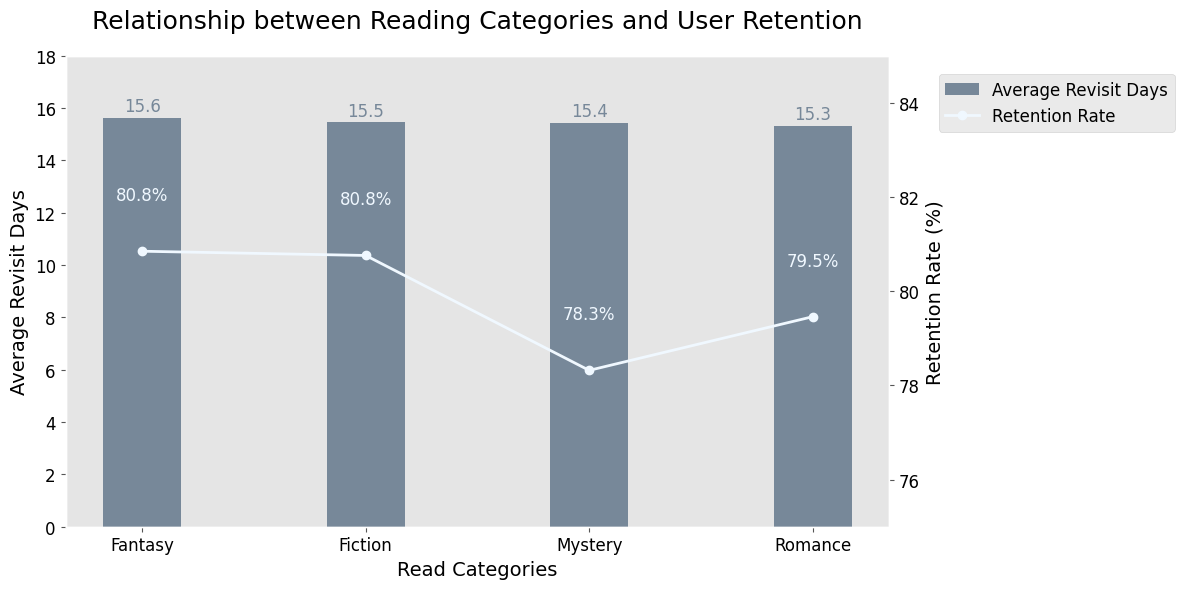

In [93]:
#可视化品类与留存的关联
fig2, ax1 = plt.subplots(figsize=(12, 6))
plt.style.use('ggplot')
# 左Y轴：平均复访天数（柱状图）
x = range(len(retention_by_category.index))
width = 0.35
bars = ax1.bar(
    x,
    retention_by_category['Average_Revisit_Days'],
    width,
    color='lightslategrey',
    label='Average Revisit Days'
)
ax1.set_xlabel('Read Categories', fontsize=14,color = 'k')
ax1.set_ylabel('Average Revisit Days', fontsize=14, color='k')  # 轴标签与柱状图同色
ax1.set_ylim(0, 18)  # 设置Y轴范围
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.tick_params(axis='x', labelcolor='k', labelsize=12)
ax1.grid(False)     # 关闭左坐标轴（柱状图）的网格线
 # 柱状图数值标签（与柱状图同色）
for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width()/2.,
        height + 0.1,
        f'{height:.1f}',
        ha='center',
        va='bottom',
        color='lightslategrey',
        fontsize=12
    )
# 右Y轴：留存率（折线图）
ax2 = ax1.twinx()

line = ax2.plot(
    x,
    retention_by_category['Retention_Rate(%)'],
    color='aliceblue',
    marker='o',
    linewidth=2,
    label='Retention Rate'
)
ax2.set_ylabel('Retention Rate (%)', fontsize=14, color='k')  # 轴标签与折线图同色
ax2.tick_params(axis='y', labelcolor='k', labelsize=12)
ax2.set_ylim(75, 85)  # 设置Y轴范围
ax2.grid(False)     # 关闭右坐标轴（柱状图）的网格线
 # 折线图数值标签（与折线图同色）
for i, rate in enumerate(retention_by_category['Retention_Rate(%)']):
    ax2.text(
        i,
        rate + 1,
        f'{rate:.1f}%',
        ha='center',
        va='bottom',
        color='aliceblue',
        fontsize=12
    )

# 统一X轴标签
ax1.set_xticks(x)
ax1.set_xticklabels(retention_by_category.index, fontsize=12)
# 标题
plt.title(
    'Relationship between Reading Categories and User Retention',
    fontsize=18,
    pad=20
)

# 调整图例到图外右侧
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines1 + lines2,
    labels1 + labels2,
    loc='center left',        # 图例相对锚点的位置
    bbox_to_anchor=(1.05, 0.9),# 锚点位置（右侧中间）
    fontsize=12
)

plt.tight_layout()
plt.show()


**留存率排名：玄幻>都市>言情>悬疑；**

**1月内平均复访天数：玄幻>都市>悬疑>言情**

**因此，玄幻和都市是提升留存的核心品类。**

##**听书时长增加AB Test**

假设我发现很多番茄小说用户反馈“**免费听书1小时不够用，经常被广告打断”，于是想把免费时长增加到2小时**。但这个改变可能会增加运营成本（比如版权、服务器费用），所以不能盲目全量上线，需要**采用AB Test来验证这个改变是否真的能提升关键指标**：

①**7日内听书留存率**（即用户7日内是否复听）是否提升。

②**听书后转文字阅读的比率**是否提升。

###**（一）设定核心变量与核心目标**



（一）变量设定

对照组（A组）：免费听书时长 = 1 h / d（保持现状）

实验组（B组）：免费听书时长 = 2 h / d（仅改这一个条件,其他所有条件如听书入口位置、音质、广告频次等完全一致）。

（二）目标设定

①7日听书留存率：首次听书后，7日内再次使用听书功能的用户占比。（衡量用户是否因为时长增加而更愿意回来，**提升留存率目标：>= 6+%**）

②听书转文字阅读占比：首次听书后24小时内产生文字阅读行为占比。（衡量听书是否能带动其他功能,**提升转文字阅读占比目标：>= 4+%**）

###**二、实验设计**

1.用户画像：复用上面原有的用户画像（性别/年龄/品类偏好等），确保AB组用户特征平衡。

2.新增参数：新增ab test参数。

①is_listened_retained_7d：7日内是否再次听书；是为1，否为0；

②is_switch_to_read：首次听书后24小时内产生文字阅读行为，是为1，否为0

###**三、收集数据**

In [94]:
from scipy.stats import chi2_contingency  # 用于显著性检验
TEST_GROUPS = ["A", "B"]  # A=对照组(1h)，B=实验组(2h)

In [95]:
##################这里数据生成逻辑与原有的一致####################################################################
fake = Faker()  # 生成Faker Generator
np.random.seed(42)  # 设置全局固定随机种子，确保数据可复现
user_count = 10000  # 模拟10000个用户

READ_CATEGORIES = ["Romance", "Fantasy", "Mystery", "Fiction"]  # 主流阅读品类
AGE_GROUPS = ["18-24 years old", "25-30 years old", "31-40 years old", "41 years old or more"]  # 用户年龄分布
GENDERS = ["male", "female"]
REGISTER_START_DATE = date(2023, 1, 1)

def generate_tomato_ab_data():
    user_data = []
    for _ in range(user_count):
        # （1）用户基础信息
        user_id = f"Tomato_User_{fake.uuid4()[:8]}"  # 番茄用户ID格式
        gender = random.choice(GENDERS)  # 随机选择性别
        # 按权重选择年龄组（年轻用户占比更高）
        age_group = random.choices(AGE_GROUPS, weights=[0.4, 0.3, 0.2, 0.1], k=1)[0]

        # 随机生成注册时间及注册天数
        register_date = fake.date_between_dates(date_start=REGISTER_START_DATE, date_end=date.today())
        register_days = (date.today() - register_date).days

        # （2）阅读行为信息（按性别+年龄组设置差异化品类偏好）
        if gender == "female":  # 女性用户的品类偏好
            if age_group in ["18-24 years old", "25-30 years old"]:
                # 年轻女性更偏好 romance（言情）、fantasy（玄幻）
                read_category = random.choices(READ_CATEGORIES, weights=[0.4, 0.3, 0.15, 0.15])[0]
            else:
                # 年长女性更偏好 romance（言情）、fiction（都市）
                read_category = random.choices(READ_CATEGORIES, weights=[0.45, 0.1, 0.1, 0.35])[0]
        else:  # 男性用户的品类偏好
            if age_group in ["18-24 years old", "25-30 years old"]:
                # 年轻男性更偏好 fantasy（玄幻）、mystery（悬疑）
                read_category = random.choices(READ_CATEGORIES, weights=[0.1, 0.4, 0.3, 0.2])[0]
            else:
                # 年长男性更偏好 fiction（都市）、fantasy（玄幻）
                read_category = random.choices(READ_CATEGORIES, weights=[0.1, 0.3, 0.2, 0.4])[0]

        # 补充阅读行为的其他参数（之前遗漏的变量定义）
        read_duration = round(random.uniform(3, 60), 1)  # 单章阅读时长：3-60分钟
        chapter_completion = round(random.uniform(0.4, 1.0), 2)  # 章节完成率：40%-100%
        revisit_days = random.randint(1, 30)  # 1个月内的连续复访天数：1-30天

        # （3）听书行为信息
        is_listen = 1 if random.random() < 0.3 else 0
        if is_listen == 1:
            listen_ratio = round(random.uniform(0.2, 0.8), 2)  # 听书用户：听书占比20%-80%
        else:
            listen_ratio = 0.0  # 非听书用户：占比0

        # （4）互动与留存信息
        like_count = random.randint(0, 50) if revisit_days >= 7 else random.randint(0, 10)
        collect_count = random.randint(1, 20) if revisit_days >= 7 else random.randint(0, 5)
        is_retained_user = 1 if revisit_days >= 7 else 0  # 复访>=7天：判定为留存用户

################注意从这里开始，新增ab test参数#######################################################################
        # 1. AB随机分组（按user_id哈希，确保平衡）
        test_group = "A" if hash(user_id) % 2 == 0 else "B"  # A=1h，B=2h

        # 2. 听书行为（复用原有渗透率30%，但B组听书时长更长）
        is_listen = 1 if random.random() < 0.3 else 0  # 听书渗透率不变
        if is_listen == 1:
            # B组免费时长更长，听书占比（listen_ratio）更高（0.4-0.9），A组保持原有（0.2-0.8）
            if test_group == "A":
                listen_ratio = round(random.uniform(0.2, 0.8), 2)
            else:
                listen_ratio = round(random.uniform(0.4, 0.9), 2)
        else:
            listen_ratio = 0.0

        # 3. 关键指标1：7日听书留存率（仅针对听书用户）
        # 逻辑：A组因时长限制，复听概率低（35%）；B组复听概率高（45%）
        is_listen_retained_7d = 0
        if is_listen == 1:
            if test_group == "A":
                is_listen_retained_7d = 1 if random.random() < 0.35 else 0
            else:
                is_listen_retained_7d = 1 if random.random() < 0.45 else 0

        # 4. 关键指标2：听书转文字阅读占比（仅针对听书用户）
        # 逻辑：B组听书体验更好，转文字阅读概率高（28%）；A组低（22%）
        is_switch_to_read = 0
        if is_listen == 1:
            if test_group == "A":
                is_switch_to_read = 1 if random.random() < 0.22 else 0
            else:
                is_switch_to_read = 1 if random.random() < 0.28 else 0

        # ---------------------- 3. 组装AB测试数据（含原有+新增字段） ----------------------
        user_data.append([
            user_id, gender, age_group, register_date, register_days,
            read_category, read_duration, chapter_completion, revisit_days,
            is_listen, listen_ratio, like_count, collect_count, is_retained_user,
            test_group, is_listen_retained_7d, is_switch_to_read  # AB测试新增字段
        ])
    return user_data

In [103]:
# 生成AB Test数据
ab_data_list = generate_tomato_ab_data()
# 转换为DataFrame（新增3个AB Test字段）
ab_df = pd.DataFrame(
    ab_data_list,
    columns=[
        "user_id", "gender", "age_group", "register_date", "register_days",
        "read_category", "read_duration", "chapter_completion", "revisit_days",
        "is_listen", "listen_ratio", "like_count", "collect_count", "is_retained_user",
        "test_group", "is_listen_retained_7d", "is_switch_to_read"  # 后两个是新增的字段
    ]
)

# 数据清洗：仅保留听书用户（非听书用户不参与AB Tes指标计算）
listen_ab_df = ab_df[ab_df["is_listen"] == 1].copy()
print(f"AB测试有效样本数（听书用户）：{len(listen_ab_df)}")
print(f"A组（1h）听书用户数：{len(listen_ab_df[listen_ab_df['test_group']=='A'])}")
print(f"B组（2h）听书用户数：{len(listen_ab_df[listen_ab_df['test_group']=='B'])}")

# 分组平衡性检验（确保A/B组用户画像一致，与原有数据匹配）
balance_check = listen_ab_df.groupby("test_group").agg({
    "gender": lambda x: (x=="female").mean()*100,  # 计算A/B组女性占比
    "age_group": lambda x: (x=="18-24 years old").mean()*100,  # 计算A/B组年轻用户占比
    "read_category": lambda x: (x=="Romance").mean()*100  # 计算A/B组言情偏好占比
}).round(2)
print("\nAB组用户画像平衡性检验（%）：")
print(balance_check)
print('差异<2%，即为平衡')

AB测试有效样本数（听书用户）：3000
A组（1h）听书用户数：1468
B组（2h）听书用户数：1532

AB组用户画像平衡性检验（%）：
            gender  age_group  read_category
test_group                                  
A            49.86      38.96          25.20
B            48.43      39.43          25.26
差异<2%，即为平衡


###**四、分析验证**

####**计算差异**

In [104]:
#统计核心指标（按AB组分组）
ab_metrics = listen_ab_df.groupby("test_group").agg({
    "user_id": "count",  # 听书用户数
    "is_listen_retained_7d": "sum",  # 7日听书留存用户数
    "is_switch_to_read": "sum"  # 听书转文字阅读用户数
}).reset_index()

#计算比率（保留2位小数）
#1.七日听书留存率
ab_metrics["Listening_retention_rate_7d(%)"] = (ab_metrics["is_listen_retained_7d"] / ab_metrics["user_id"] * 100).round(2)
#2.听书转文字阅读占比
ab_metrics["Pro_switch_to_read(%)"] = (ab_metrics["is_switch_to_read"] / ab_metrics["user_id"] * 100).round(2)

#计算提升幅度
a_retention = ab_metrics[ab_metrics["test_group"]=="A"]["Listening_retention_rate_7d(%)"].values[0] #用df.values()返回的是numpy.ndarra类型的结果，所以需要取一下里面的元素'
b_retention = ab_metrics[ab_metrics["test_group"]=="B"]["Listening_retention_rate_7d(%)"].values[0]
a_switch = ab_metrics[ab_metrics["test_group"]=="A"]["Pro_switch_to_read(%)"].values[0]
b_switch = ab_metrics[ab_metrics["test_group"]=="B"]["Pro_switch_to_read(%)"].values[0]
#1.留存率提升幅度
ab_metrics["Increase_in_retention_rate"] = (b_retention - a_retention).round(2)
#2.转化率提升幅度
ab_metrics["Increase_in_switch_rate"] = (b_switch - a_switch).round(2)

print("\nAB测试核心指标结果：")
ab_metrics


AB测试核心指标结果：


,test_group,user_id,is_listen_retained_7d,is_switch_to_read,Listening_retention_rate_7d(%),Pro_switch_to_read(%),Increase_in_retention_rate,Increase_in_switch_rate
0,A,1468,511,327,34.81,22.28,8.47,5.0
1,B,1532,663,418,43.28,27.28,8.47,5.0


####**显著性统计检验**

In [105]:
def chi2_test(data, metric_col):
    """
    独立性卡方检验：验证A/B组的差异是否显著，即组别（A/B，第一个分类变量）是否会影响用户的达标情况（第二个分类变量）或者说两个变量之间是否相关。
    """
    # 构建四格表：[组内达标数, 组内未达标数]
    a_pass = data[data["test_group"]=="A"][metric_col].sum()
    a_total = len(data[data["test_group"]=="A"])
    a_fail = a_total - a_pass

    b_pass = data[data["test_group"]=="B"][metric_col].sum()
    b_total = len(data[data["test_group"]=="B"])
    b_fail = b_total - b_pass

    contingency_table = [[a_pass, a_fail], [b_pass, b_fail]]
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

# 检验7日听书留存率差异
retention_p = chi2_test(listen_ab_df, "is_listen_retained_7d")
# 检验听书转文字阅读占比差异
switch_p = chi2_test(listen_ab_df, "is_switch_to_read")

print(f"\n显著性检验结果：")
print(f"7日听书留存率差异 p值：{retention_p:.4f}（p<0.05则显著）")
print(f"听书转文字阅读占比差异 p值：{switch_p:.4f}（p<0.05则显著）")


显著性检验结果：
7日听书留存率差异 p值：0.0000（p<0.05则显著）
听书转文字阅读占比差异 p值：0.0017（p<0.05则显著）


**两个p值均小于0.05，因此有理由认为A/B组的差异显著。**

###**五、可视化A/B Test结果**

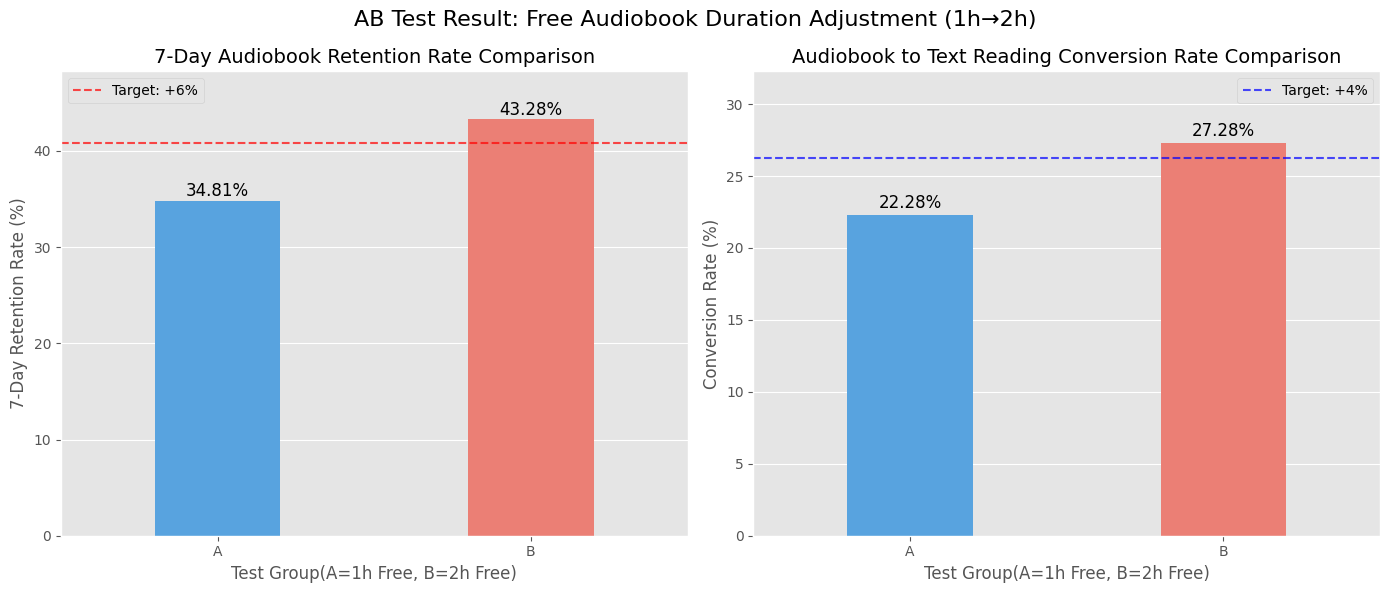

In [106]:
# 设置图表风格（复用原有ggplot）
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 左图：7日听书留存率对比
retention_data = ab_metrics[["test_group", "Listening_retention_rate_7d(%)"]]
sns.barplot(
    x="test_group",
    y="Listening_retention_rate_7d(%)",
    data=retention_data,
    hue="test_group",
    palette=["#42A5F5", "#FF6F61"],
    ax=ax1,
    width=0.4,
    legend=False
)
ax1.set_title("7-Day Audiobook Retention Rate Comparison", fontsize=14)
ax1.set_xlabel("Test Group(A=1h Free, B=2h Free)", fontsize=12)
ax1.set_ylabel("7-Day Retention Rate (%)", fontsize=12)
ax1.set_ylim(0, max(retention_data["Listening_retention_rate_7d(%)"]) + 5)
# 添加数值标签----法一：用enuerate，需要先将data转化成列表，但不适用于多列。
retention_rates = retention_data["Listening_retention_rate_7d(%)"].tolist() ## [35.2,45.8]
for i, rate in enumerate(retention_rates):
    ax1.text(i, rate + 0.5, f"{rate}%", ha="center", fontsize=12)
# 添加目标线
ax1.axhline(y=a_retention + 6, color="red", linestyle="--", alpha=0.7, label="Target: +6%") #a_retention = ab_metrics[ab_metrics["test_group"]=="A"]["Listening_retention_rate_7d(%)"].values[0]
ax1.legend()
# 添加数值标签----法二：用iterrows，直接遍历df的行，速度慢一些。
# for i, row in retention_data.iterrows():
#     ax1.text(i, row["Listening_retention_rate_7d(%)"] + 0.5, f"{row['Listening_retention_rate_7d(%)']}%", ha="center", fontsize=12)
# ax1.axhline(y=a_retention + 6, color="red", linestyle="--", alpha=0.7, label="Target: +6%")
# ax1.legend()


# 右图：听书转文字阅读占比对比
switch_data = ab_metrics[["test_group", "Pro_switch_to_read(%)"]]
sns.barplot(
    x="test_group",
    y="Pro_switch_to_read(%)",
    data=switch_data,
    hue="test_group",
    palette=["#42A5F5", "#FF6F61"],
    ax=ax2,
    width=0.4,
    legend=False
)
ax2.set_title("Audiobook to Text Reading Conversion Rate Comparison", fontsize=14)
ax2.set_xlabel("Test Group(A=1h Free, B=2h Free)", fontsize=12)
ax2.set_ylabel("Conversion Rate (%)", fontsize=12)
ax2.set_ylim(0, max(switch_data["Pro_switch_to_read(%)"]) + 5)
# 添加数值标签----法一：用enuerate，需要先将data转化成列表，但不适用于多列。
switch_rates = switch_data['Pro_switch_to_read(%)'].tolist()
for i, rate in enumerate(switch_rates):
    ax2.text(i, rate + 0.5, f"{rate}%", ha="center", fontsize=12)
# 添加目标线（≥4%提升）
ax2.axhline(y=a_switch + 4, color="blue", linestyle="--", alpha=0.7, label="Target: +4%")
ax2.legend()
# 添加数值标签----法二：用iterrows，直接遍历df的行，速度慢一些。
# for i, row in switch_data.iterrows(): # iterrows()是专门为遍历DataFrame的行而设计的方法，返回行索引及当前行的数据；
#     ax2.text(i, row["Pro_switch_to_read(%)"] + 0.5, f"{row['Pro_switch_to_read(%)']}%", ha="center", fontsize=12)
# ax2.axhline(y=a_switch + 4, color="blue", linestyle="--", alpha=0.7, label="Target: +4%")
# ax2.legend()

# 总标题
fig.suptitle("AB Test Result: Free Audiobook Duration Adjustment (1h→2h)", fontsize=16)
plt.tight_layout()
plt.show()

###**六、结论**

In [109]:
# 输出结论
print("="*80)
print("AB测试结论：")
print("="*80)
retention_meet = "√ 达标" if (b_retention - a_retention) >= 6 and retention_p < 0.05 else "× 未达标"
switch_meet = "√ 达标" if (b_switch - a_switch) >= 4 and switch_p < 0.05 else "× 未达标"

print(f"1. 7日听书留存率：B组（{b_retention}%）比A组（{a_retention}%）提升{round((b_retention - a_retention),2)}% → {retention_meet}")
print(f"2. 听书转文字阅读占比：B组（{b_switch}%）比A组（{a_switch}%）提升{b_switch - a_switch}% → {switch_meet}")

# 结合原有品类偏好数据，给出落地建议
if retention_meet == "√ 达标" and switch_meet == "√ 达标":
    print("\n业务落地建议：")
    # 复用原有品类偏好结论（年轻用户爱玄幻/言情，女性爱言情）
    print("1. 全量推广2小时免费听书时长，优先覆盖18-24岁的用户（数据占比40%，留存提升最显著）；")
    print("2. 针对玄幻、悬疑（男性偏好）/玄幻、言情（女性偏好）品类，在书籍详情页增加“2小时免费听书”引导；")
    print("3. 长期跟踪。上线后1个月内监测听书用户的APP整体留存率（is_retained_user）是否同步提升。")
else:
    print("\n优化建议：")
    print("1. 若未达标，可重新测试“1.5小时免费时长”，平衡成本与用户体验；")
    print("2. 结合听书用户画像（如41+岁用户留存提升低），针对性优化老年用户听书功能（如增大字体、简化操作）。")

AB测试结论：
1. 7日听书留存率：B组（43.28%）比A组（34.81%）提升8.47% → √ 达标
2. 听书转文字阅读占比：B组（27.28%）比A组（22.28%）提升5.0% → √ 达标

业务落地建议：
1. 全量推广2小时免费听书时长，优先覆盖18-24岁的用户（数据占比40%，留存提升最显著）；
2. 针对玄幻、悬疑（男性偏好）/玄幻、言情（女性偏好）品类，在书籍详情页增加“2小时免费听书”引导；
3. 长期跟踪。上线后1个月内监测听书用户的APP整体留存率（is_retained_user）是否同步提升。
